## Generate a dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
%matplotlib inline

np.random.seed(42)

# Generate train data
X = 0.3 * np.random.randn(100, 2)
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X + 2, X - 2, X_outliers]


In [2]:
plt.rcParams["figure.figsize"] = (10,10)

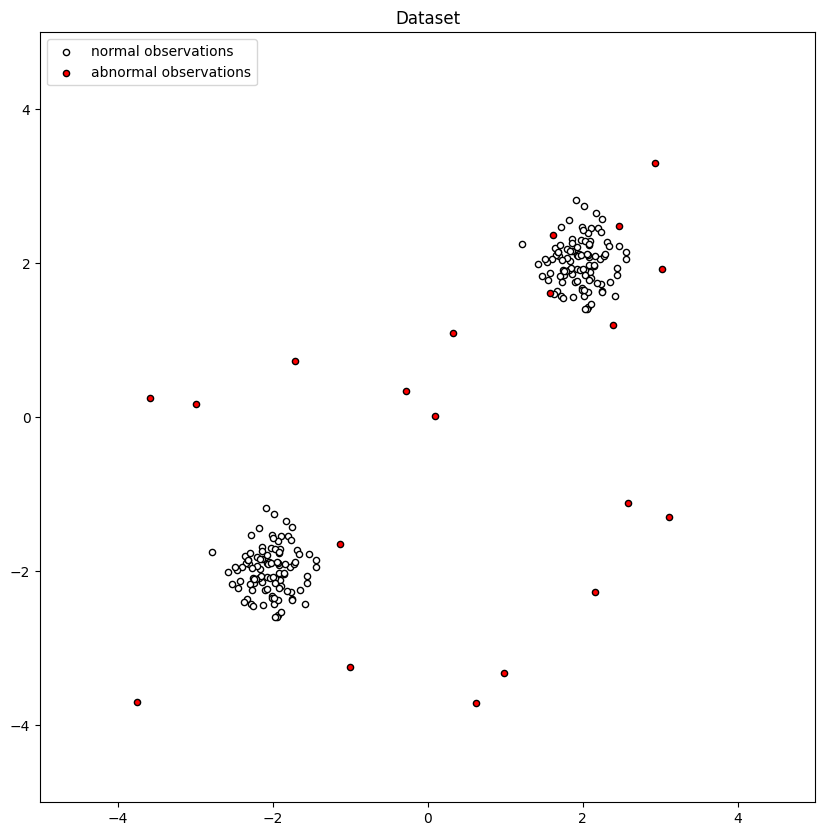

In [3]:
a = plt.scatter(X[:200, 0], X[:200, 1], c='white',
                edgecolor='k', s=20)
b = plt.scatter(X[200:, 0], X[200:, 1], c='red',
                edgecolor='k', s=20)

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="upper left")

plt.title("Dataset")

plt.show()


## Automatic multivariate tools

In [4]:
from sklearn.neighbors import LocalOutlierFactor

# fit the model
clf = LocalOutlierFactor(n_neighbors=20, novelty=True)
clf.fit(X)
y_pred_test = clf.predict(X)
y_pred_outliers = y_pred_test[200:]

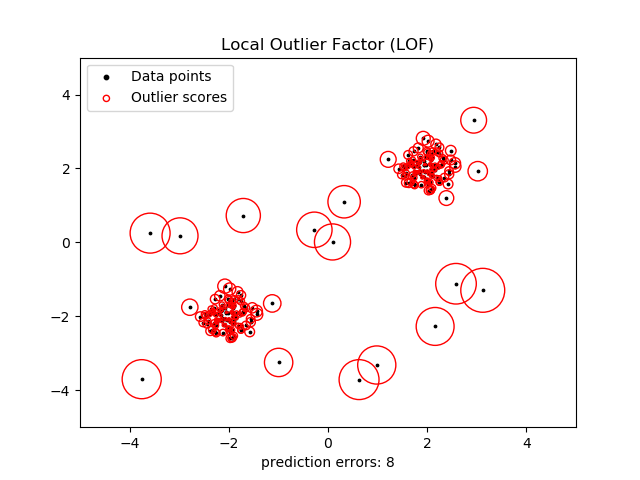

In [5]:
from IPython.display import Image
Image(filename='sphx_glr_plot_lof_outlier_detection_001.png')

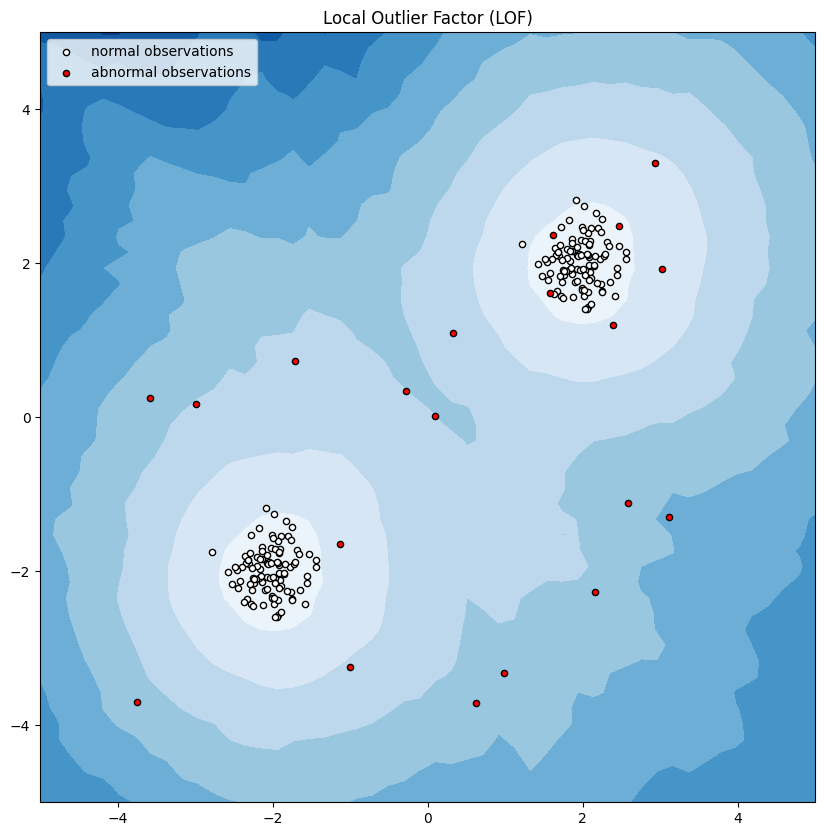

In [6]:
# plot the level sets of the decision function
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(X[:200, 0], X[:200, 1], c='white',
                edgecolor='k', s=20)
b = plt.scatter(X[200:, 0], X[200:, 1], c='red',
                edgecolor='k', s=20)
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="upper left")

plt.title("Local Outlier Factor (LOF)")

plt.show()

In [7]:
# fit the model
clf = IsolationForest(max_samples=100)
clf.fit(X)
y_pred_forest = clf.predict(X)

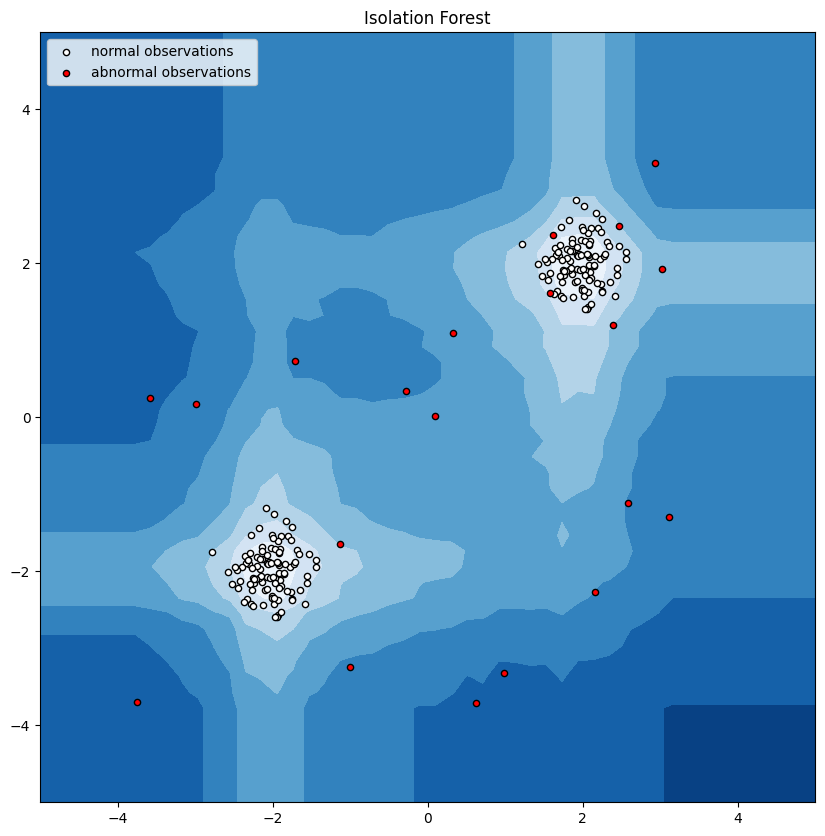

In [8]:
plt.title("Isolation Forest")

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(X[:200, 0], X[:200, 1], c='white',
                edgecolor='k', s=20)
b = plt.scatter(X[200:, 0], X[200:, 1], c='red',
                edgecolor='k', s=20)

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="upper left")
plt.show()

Different methods, different results

## Direct exploration

In [9]:
#OUTLIER DETECTION
#from sklearn.datasets import load_boston
#import pandas as pd

#DETECT AND REMOVE Outliers 
#boston = load_boston()

from sklearn.datasets import fetch_openml
import pandas as pd

# Load Boston dataset from OpenML
boston = fetch_openml(name='boston', version=1, as_frame=True)
boston_df = boston.frame

# Display the first few rows of the dataset
print(boston_df.head())


      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [10]:
print(boston['DESCR'])

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [11]:
boston.feature_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [12]:
'''
Load and return the boston house-prices dataset (regression).
Samples total 	506
Dimensionality 	13
Features 	real, positive
Targets 	real 5. - 50.
'''

#create the dataframe
boston_df = pd.DataFrame(boston.data)

boston_df.columns = boston.feature_names

boston_df.head()

CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33

In [13]:
boston.target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [14]:
boston_df.describe()

CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.554695    6.284634   68.574901   
std      8.601545   23.322453    6.860353    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.385000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.449000    5.885500   45.025000   
50%      0.256510    0.000000    9.690000    0.538000    6.208500   77.500000   
75%      3.677083   12.500000   18.100000    0.624000    6.623500   94.075000   
max     88.976200  100.000000   27.740000    0.871000    8.780000  100.000000   

              DIS         TAX     PTRATIO           B       LSTAT  
count  506.000000  506.000000  506.000000  506.000000  506.000000  
mean     3.795043  408.237154   18.455534  356.674032   12.653063  
std      2.105710  168.537116    2.164946   91.294864    7.141062  
min      1.129600  187.000000   12.600000    0.320000    1.730000  
25%      2.100175  279.000000   17.400000  375.377500    6.950000  
50%      3.207450  330.000000   19.050000  391.440000   11.360000  
75%      5.188425  666.000000   20.200000  396.225000   16.955000  
max     12.126500  711.000000   22.000000  396.900000   37.970000

<Axes: >

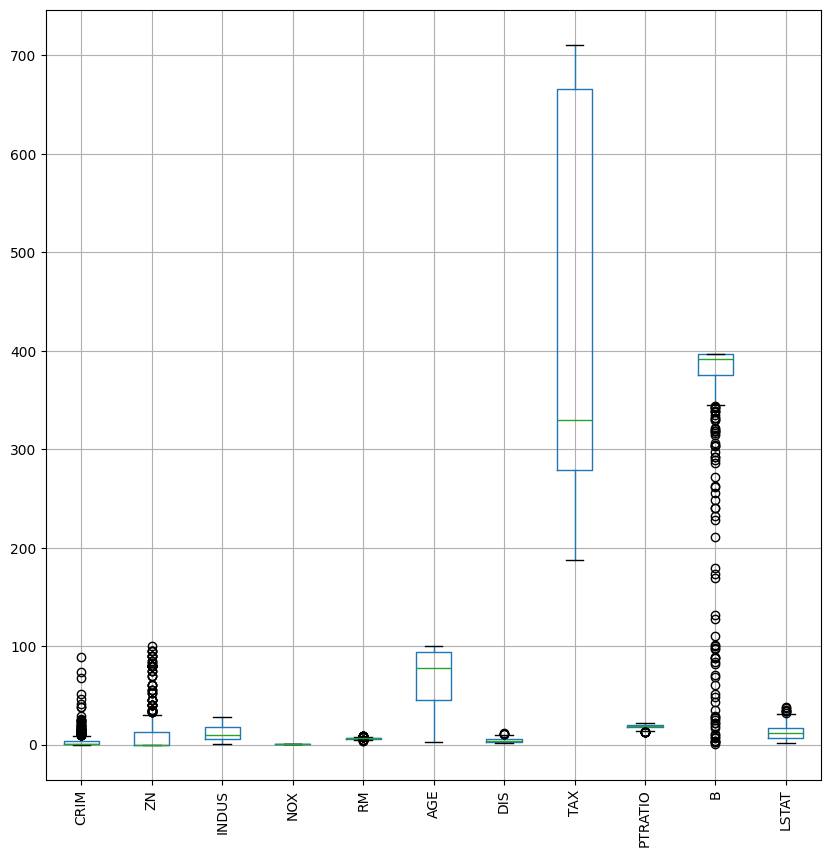

In [15]:
%matplotlib inline
boston_df.boxplot(rot=90)

<Axes: xlabel='DIS'>

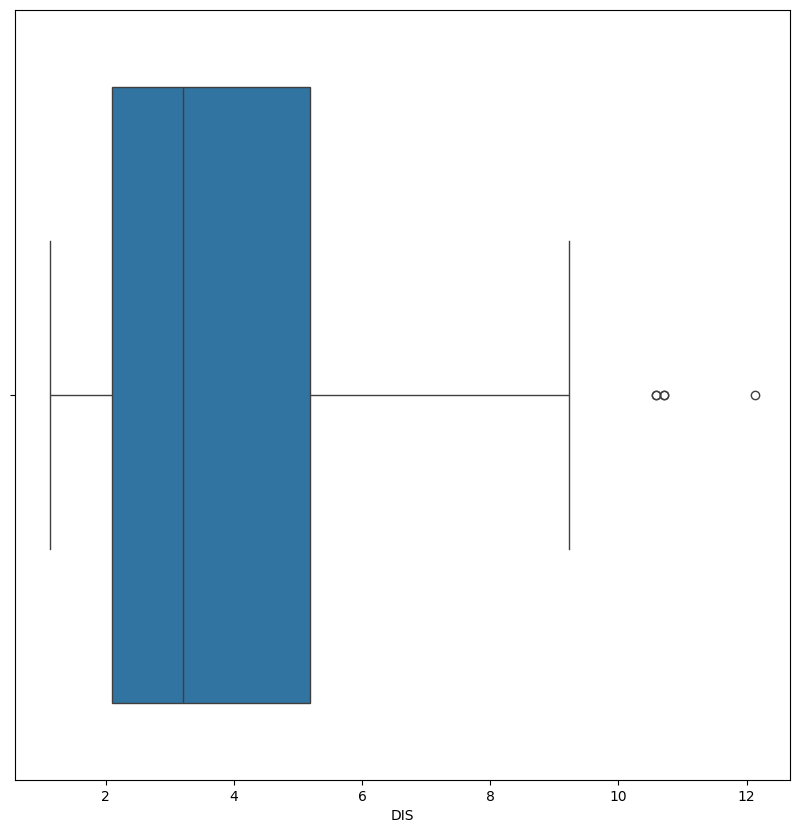

In [16]:
%matplotlib inline
import seaborn as sns

sns.boxplot(x=boston_df['DIS'])


array([[<Axes: title={'center': 'DIS'}>]], dtype=object)

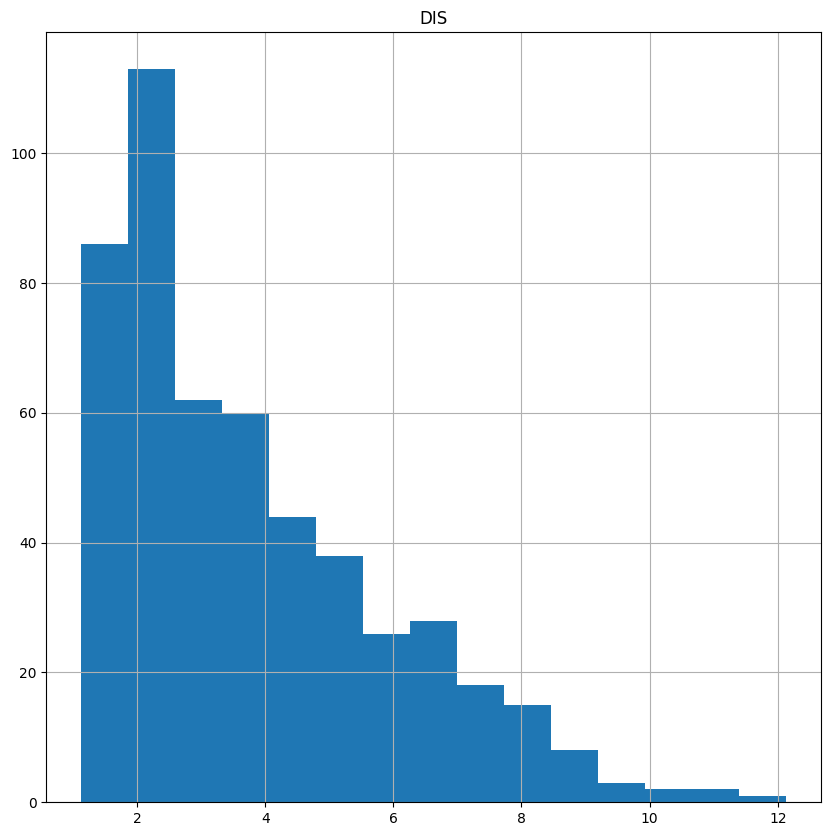

In [17]:
boston_df.hist(column="DIS", bins='auto')

array([[<Axes: title={'center': 'Data'}>]], dtype=object)

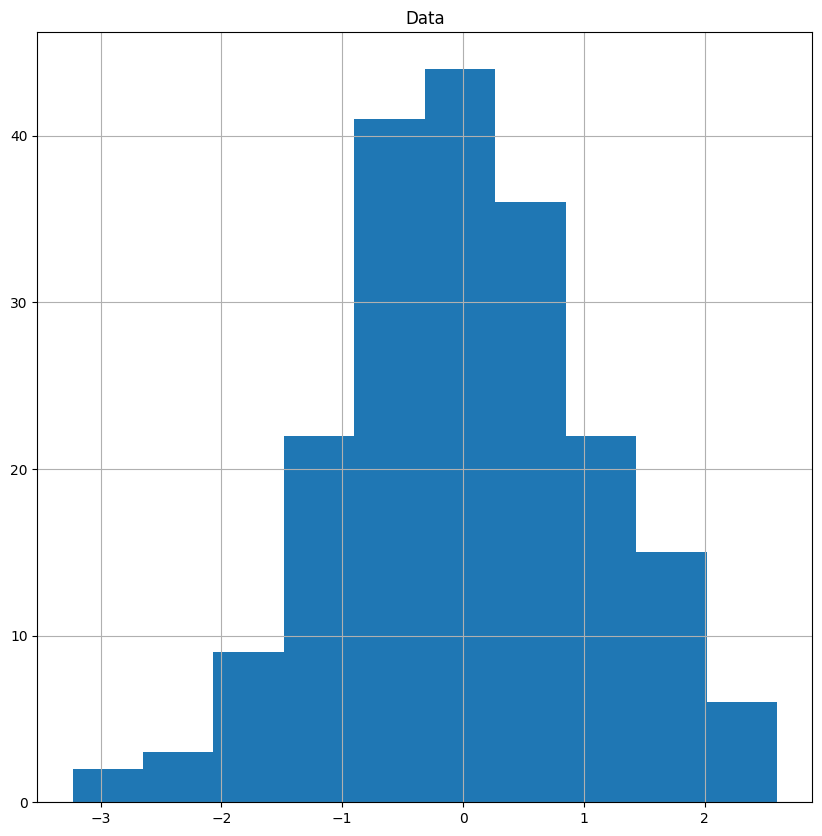

In [18]:
# HERE WE CREATE A randomly generated dataset of normally distributed data 1-column.
import numpy as np
np.random.seed(123) #you can fix the random seed for reproducibility
df = pd.DataFrame({'Data':np.random.normal(size=200)})
df.hist(column="Data")

In [19]:
df

Data
0   -1.085631
1    0.997345
2    0.282978
3   -1.506295
4   -0.578600
..        ...
195 -3.231055
196 -0.269293
197 -0.110851
198 -0.341262
199 -0.217946

[200 rows x 1 columns]

<Axes: xlabel='Data'>

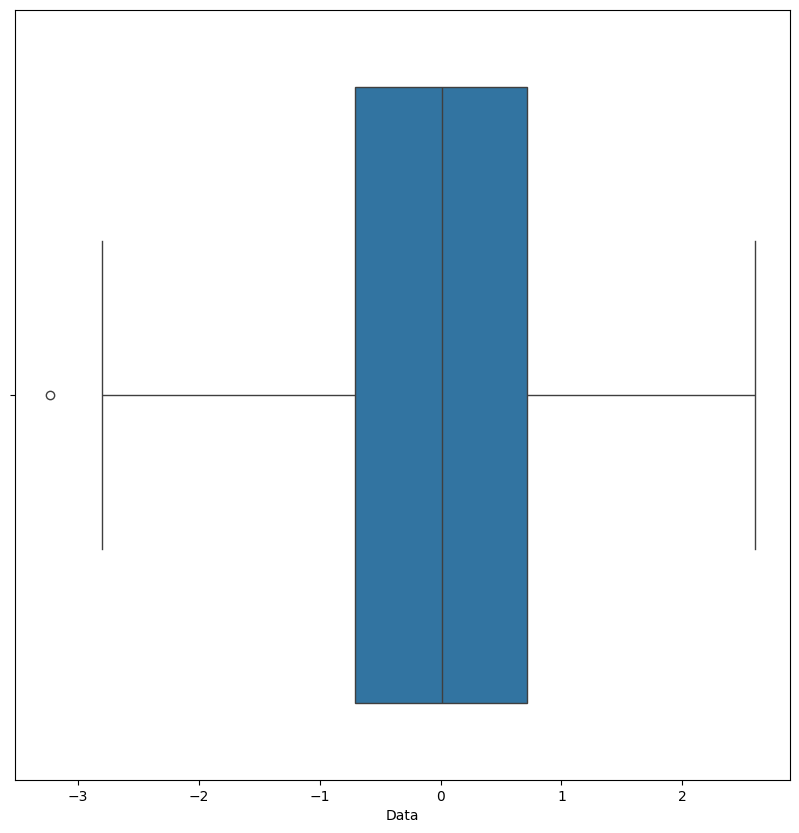

In [20]:
sns.boxplot(x=df.Data)

In [21]:
#since it is normal then I CAN REMOVE OUTLIERS Using Normal Distribution and S.D
mean = df.mean()
sd = df.std()

# keep only the ones that are within +x to -x standard deviations in the column DIS
x = 3
df = df[ np.abs(df - mean) <= 3 * sd ]

array([[<Axes: title={'center': 'Data'}>]], dtype=object)

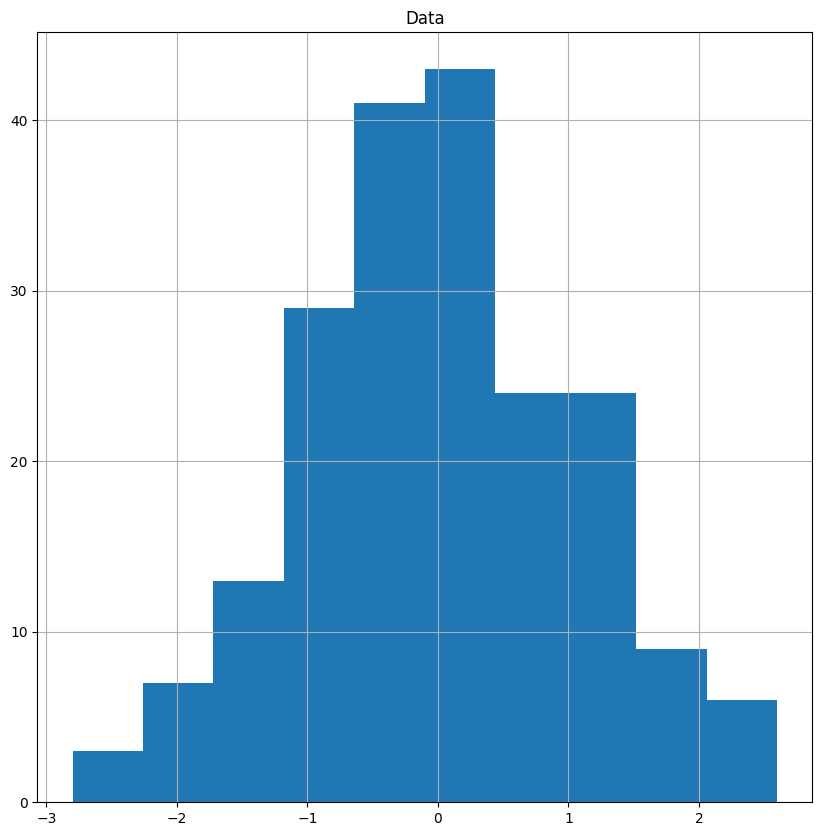

In [22]:
df.hist(column="Data")

<Axes: xlabel='Data'>

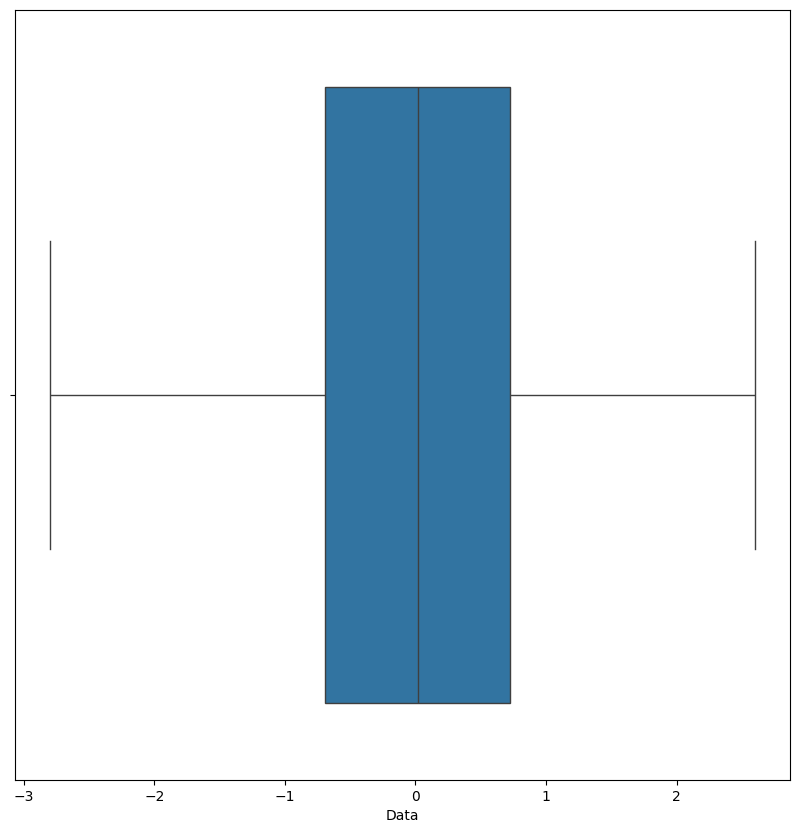

In [23]:
sns.boxplot(x=df.Data)

<Axes: xlabel='CRIM'>

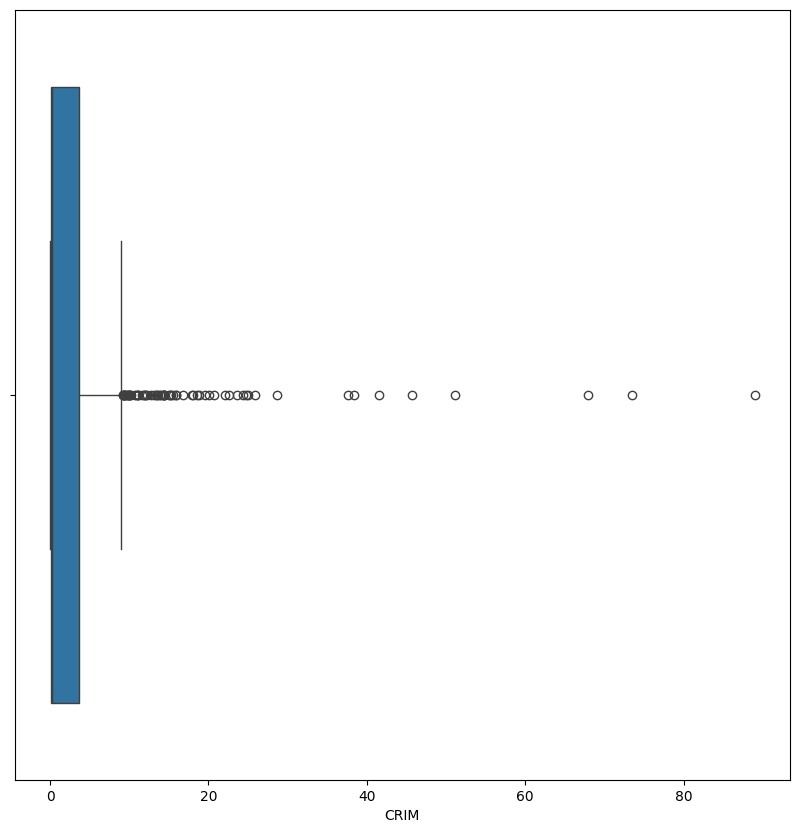

In [24]:
## check your data first 
df2=pd.DataFrame(boston_df["CRIM"])
mean2 = df2.mean()
sd2 = df2.std()

df2.describe()
sns.boxplot(x=boston_df.CRIM)

#df2.shape

array([[<Axes: title={'center': 'CRIM'}>]], dtype=object)

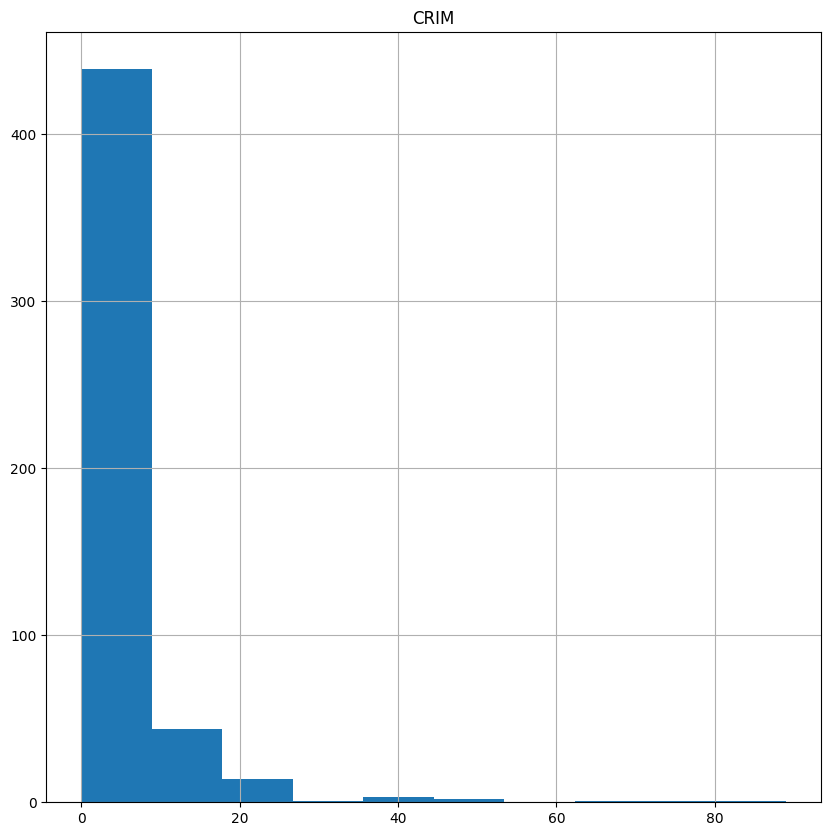

In [25]:
df2.hist()


<Axes: >

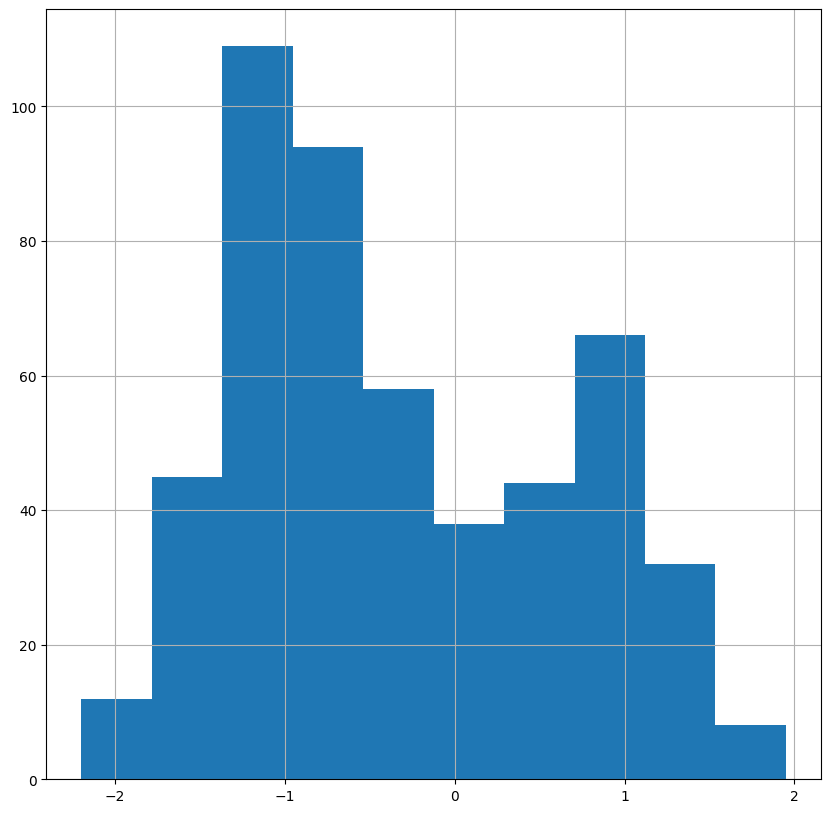

In [26]:
#df2.hist()
import numpy as np
np.log10(boston_df["CRIM"]).hist()


<Axes: xlabel='CRIM'>

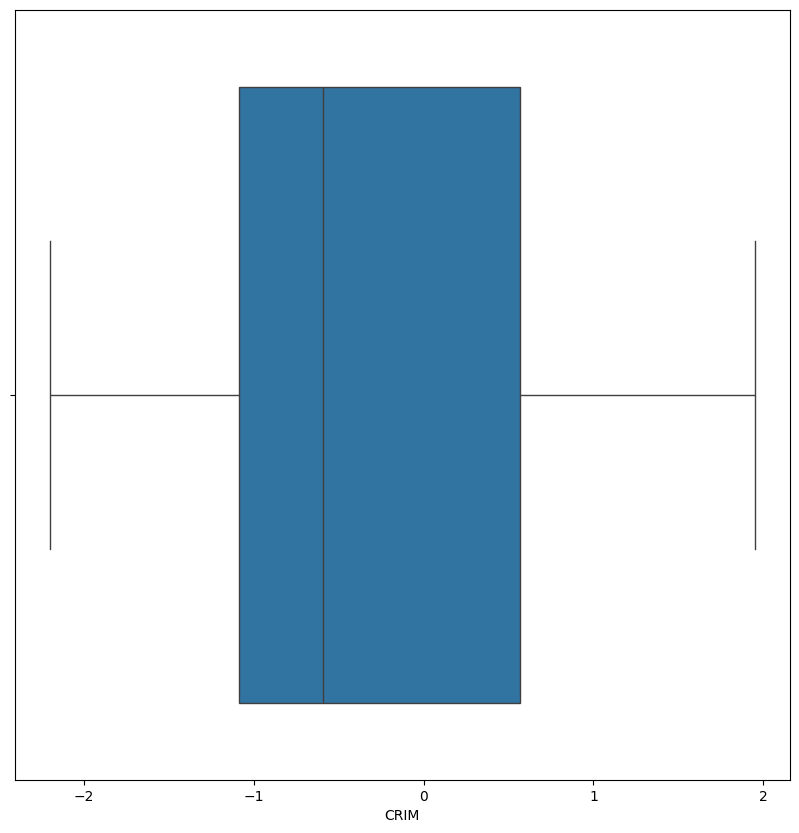

In [27]:
import numpy as np

import seaborn as sns

sns.boxplot(x=np.log10(boston_df["CRIM"]))